<a href="https://colab.research.google.com/github/Hanief00/PCVK_GANJIL_2024/blob/main/Modul_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Hanief Mochsin
* Kelas : TI-3E
* Absen : 15
* NIM : 2241720181

# TUGAS 1-3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


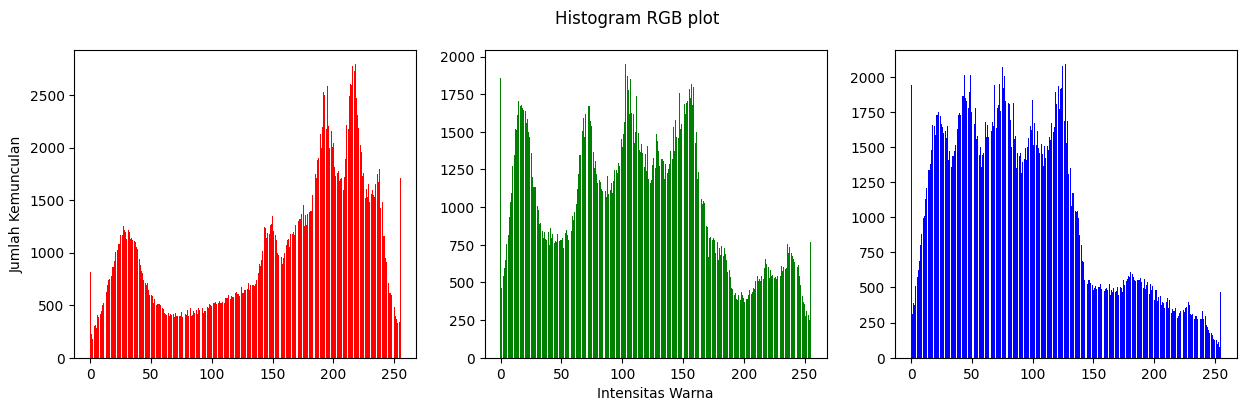

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob
from google.colab import drive

drive.mount('/content/drive')

# Membaca image
img = cv.imread('/content/drive/MyDrive/Semester 5/Pengolahan Citra dan Visi Komputer/Modul_6/lena.jpg')
# Convert image ke RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# Membagi image ke red, green, and blue channels
r, g, b = cv.split(img)
# kalkulasi histogram untuk beberapa channel
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])

# Plot histogram
plt.figure(figsize=(15, 4))
plt.suptitle("Histogram RGB plot")

plt.subplot(1, 3, 1)
plt.bar(np.arange(256), hist_r.flatten(), color="red")
plt.ylabel('Jumlah Kemunculan')

plt.subplot(1, 3, 2)
plt.bar(np.arange(256), hist_g.flatten(), color="green")
plt.xlabel('Intensitas Warna')

plt.subplot(1, 3, 3)
plt.bar(np.arange(256), hist_b.flatten(), color="blue")

plt.show()

# TUGAS 4

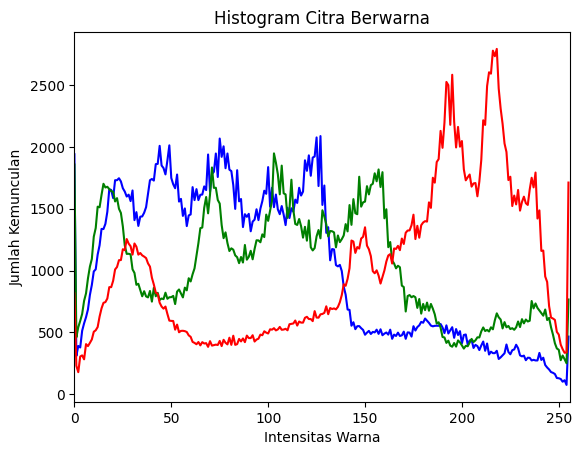

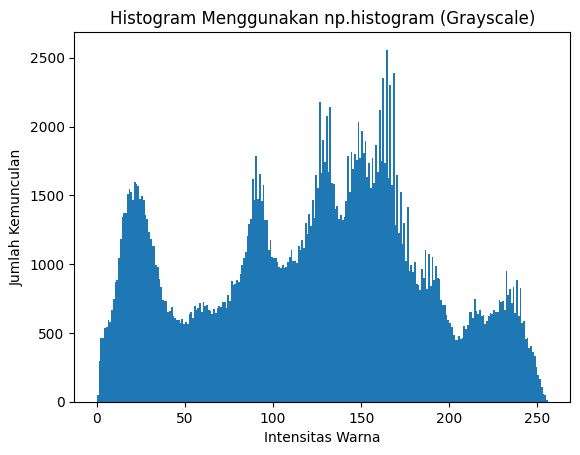

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Membaca citra
img = cv2.imread('/content/drive/MyDrive/Semester 5/Pengolahan Citra dan Visi Komputer/Modul_6/lena.jpg')

# Menghitung histogram setiap channel warna secara terpisah
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.title('Histogram Citra Berwarna')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.show()

# Menghitung histogram menggunakan np.histogram untuk channel warna grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_np, bins = np.histogram(gray_img.ravel(), 256, [0, 256])

plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title('Histogram Menggunakan np.histogram (Grayscale)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.show()

cv2.calcHist dan np.histogram keduanya menghasilkan histogram yang serupa. Meskipun mungkin ada sedikit perbedaan dalam skala y, interpretasi yang dihasilkan tetap sama. cv2.calcHist dapat digunakan apabila pengolahan citra lebih kompleks, sedangkan np.histogram lebih mudah dipahami untuk penggunaan dasar dan ringan.

# TUGAS 5

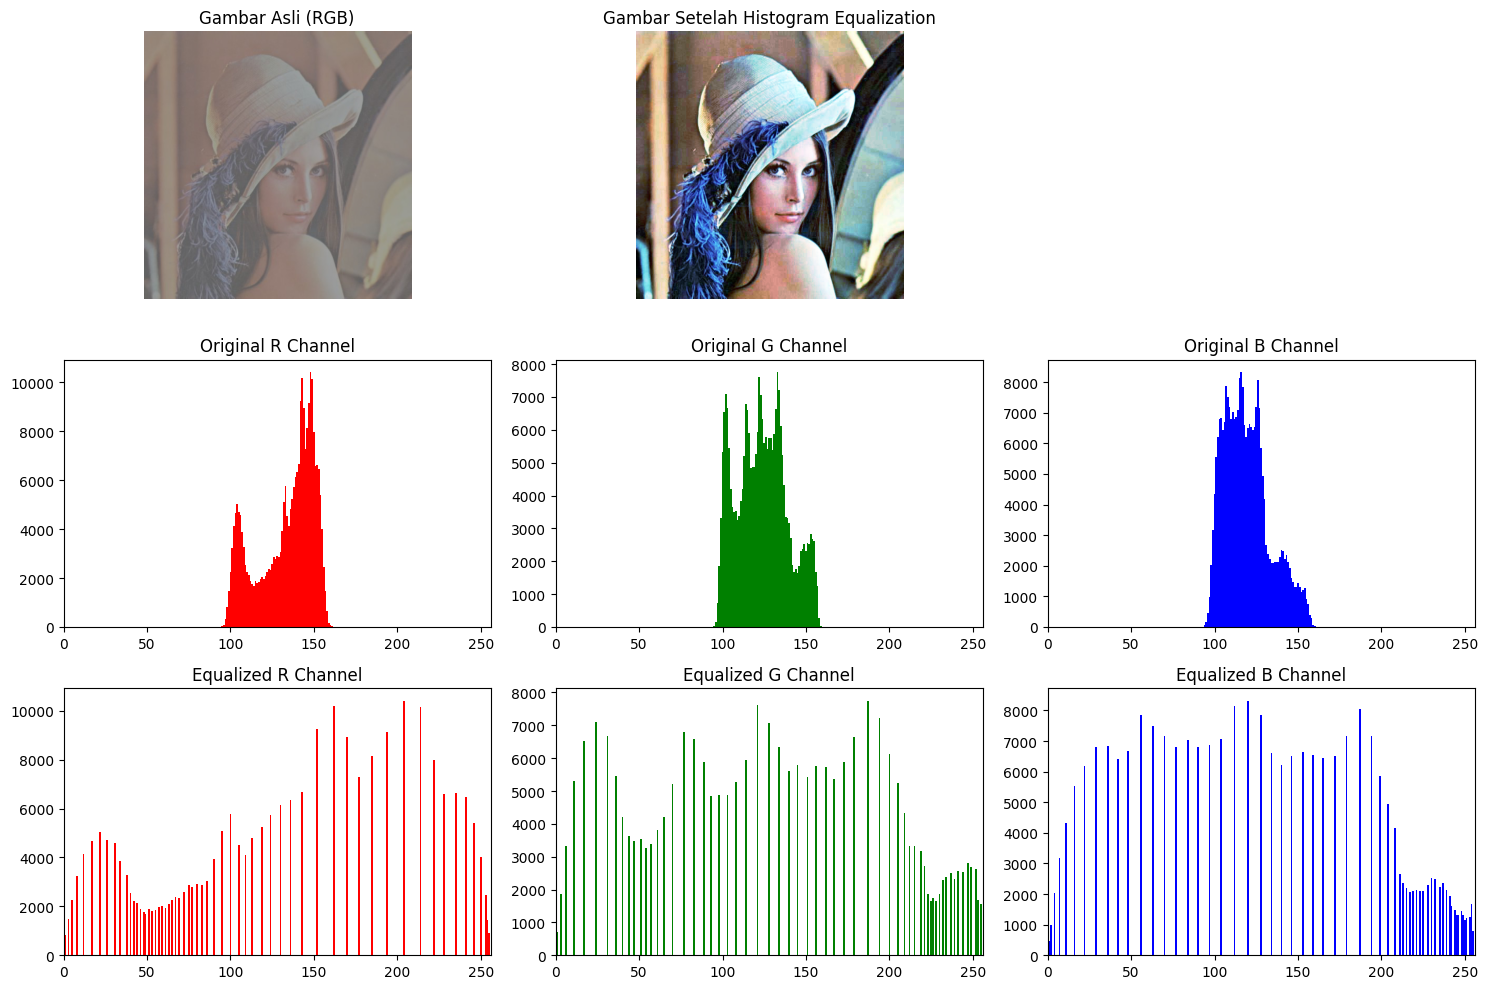

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Membaca image
image = cv2.imread('/content/drive/MyDrive/Semester 5/Pengolahan Citra dan Visi Komputer/Modul_6/lena_lc.jpg')  # Ubah path file sesuai lokasi gambar
# Convert BGR(default dari OpenCV) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Langkah 2: Memisahkan setiap channel
R, G, B = cv2.split(image_rgb)

# Langkah 3: Equalisasi masing-masing channel
R_eq = cv2.equalizeHist(R)
G_eq = cv2.equalizeHist(G)
B_eq = cv2.equalizeHist(B)

# Langkah 4: Menggabungkan kembali channel setelah equalization
image_equalized = cv2.merge([R_eq, G_eq, B_eq])

# Langkah 5: Menampilkan gambar dan plot histogram RGB sebelum dan sesudah equalization
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Gambar Asli
axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Gambar Asli (RGB)')
axes[0, 0].axis('off')

# Gambar setelah Equalization
axes[0, 1].imshow(image_equalized)
axes[0, 1].set_title('Gambar Setelah Histogram Equalization')
axes[0, 1].axis('off')

# Kosongkan satu plot
axes[0, 2].axis('off')

# Histogram asli (Red, Green, Blue)
colors = ['r', 'g', 'b']
channels = [R, G, B]
for i, (color, channel) in enumerate(zip(colors, channels)):
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])
    axes[1, i].bar(bins[:-1], hist, color=color, width=1)
    axes[1, i].set_xlim([0, 256])
    axes[1, i].set_title(f'Original {color.upper()} Channel')

# Histogram setelah Equalization (Red, Green, Blue)
equalized_channels = [R_eq, G_eq, B_eq]
for i, (color, eq_channel) in enumerate(zip(colors, equalized_channels)):
    hist, bins = np.histogram(eq_channel.flatten(), 256, [0, 256])
    axes[2, i].bar(bins[:-1], hist, color=color, width=1)
    axes[2, i].set_xlim([0, 256])
    axes[2, i].set_title(f'Equalized {color.upper()} Channel')

# Mengatur layout
plt.tight_layout()
plt.show()


# TUGAS 6

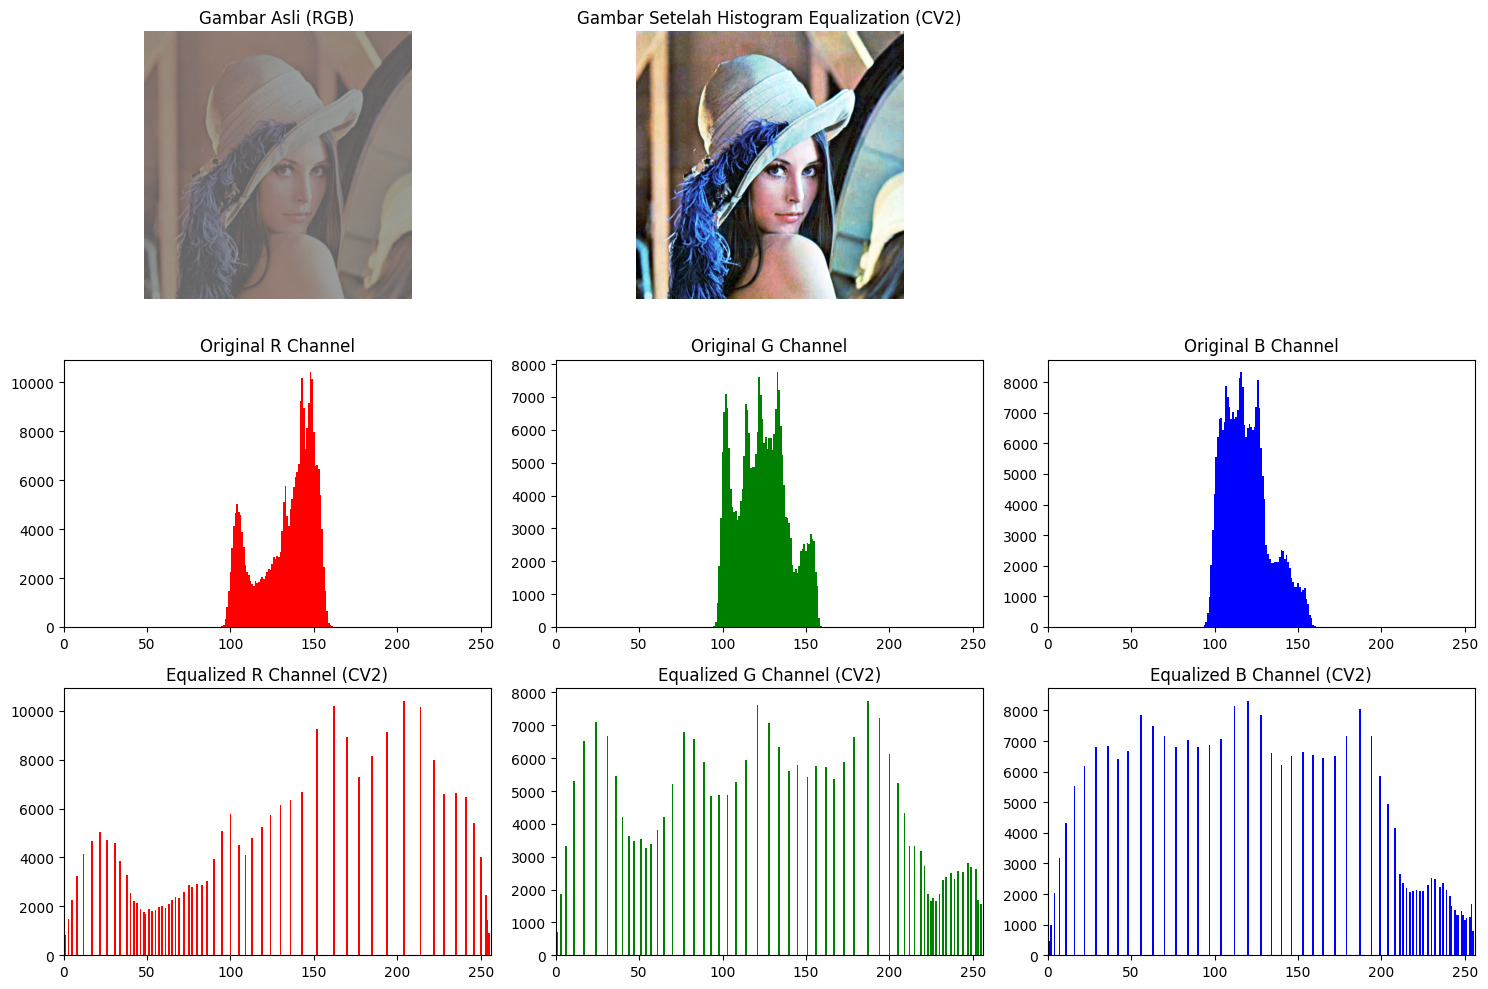

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Mengubah image BGR ke RGB

# Langkah 2: Memisahkan channel R, G, B
R, G, B = cv2.split(image_rgb)

# Langkah 3: Histogram equalization pada masing-masing channel menggunakan equalizeHist
R_eq = cv2.equalizeHist(R)
G_eq = cv2.equalizeHist(G)
B_eq = cv2.equalizeHist(B)

# Menggabungkan kembali channel yang sudah di-equalize
image_equalized_cv2 = cv2.merge([R_eq, G_eq, B_eq])

# Langkah 4: Menampilkan gambar asli dan gambar setelah histogram equalization
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Gambar Asli
axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Gambar Asli (RGB)')
axes[0, 0].axis('off')

# Gambar setelah Equalization
axes[0, 1].imshow(image_equalized_cv2)
axes[0, 1].set_title('Gambar Setelah Histogram Equalization (CV2)')
axes[0, 1].axis('off')

# Kosongkan satu plot
axes[0, 2].axis('off')

# Histogram asli (Red, Green, Blue)
colors = ['r', 'g', 'b']
channels = [R, G, B]
for i, (color, channel) in enumerate(zip(colors, channels)):
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])
    axes[1, i].bar(bins[:-1], hist, color=color, width=1)
    axes[1, i].set_xlim([0, 256])
    axes[1, i].set_title(f'Original {color.upper()} Channel')

# Histogram setelah Equalization (CV2) (Red, Green, Blue)
equalized_channels_cv2 = [R_eq, G_eq, B_eq]
for i, (color, eq_channel_cv2) in enumerate(zip(colors, equalized_channels_cv2)):
    hist_cv2, bins_cv2 = np.histogram(eq_channel_cv2.flatten(), 256, [0, 256])
    axes[2, i].bar(bins_cv2[:-1], hist_cv2, color=color, width=1)
    axes[2, i].set_xlim([0, 256])
    axes[2, i].set_title(f'Equalized {color.upper()} Channel (CV2)')

# Mengatur layout
plt.tight_layout()
plt.show()


Hasil histogram equalization dengan cv2.equalizeHist() hampir sama dengan metode manual karena prinsip dasarnya sama, meski ada perbedaan kecil dalam penanganan distribusi warna, secara visual histogram dan gambar tetap mirip.

# TUGAS 7

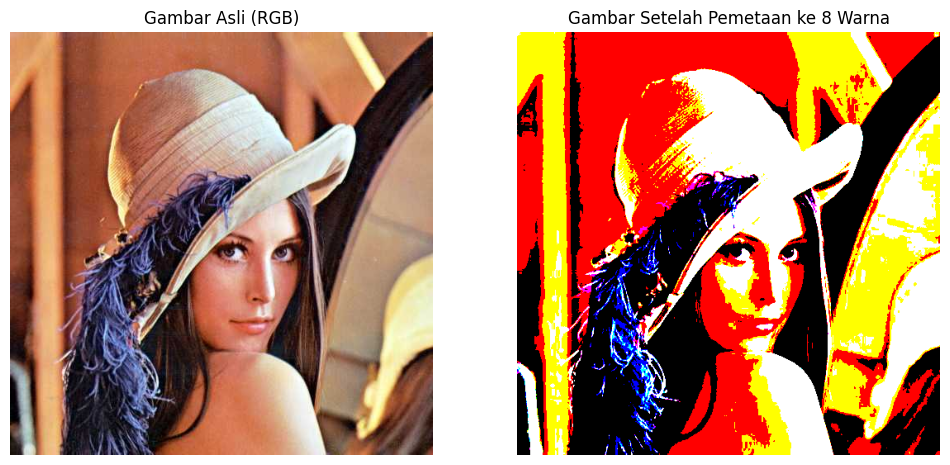

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Membaca gambar
image = cv2.imread('/content/drive/MyDrive/Semester 5/Pengolahan Citra dan Visi Komputer/Modul_6/lena.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Mengubah BGR ke RGB

# Langkah 2: Mendefinisikan warna yang akan digunakan (8 warna)
colors = {
    'black': np.array([0, 0, 0]),
    'white': np.array([255, 255, 255]),
    'red': np.array([255, 0, 0]),
    'green': np.array([0, 255, 0]),
    'blue': np.array([0, 0, 255]),
    'yellow': np.array([255, 255, 0]),
    'cyan': np.array([0, 255, 255]),
    'magenta': np.array([255, 0, 255])
}

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

# Fungsi untuk memetakan setiap piksel ke warna terdekat
def map_color(pixel):
    min_distance = float('inf')
    closest_color = None
    for color_name, color_value in colors.items():
        distance = euclidean_distance(pixel, color_value)
        if distance < min_distance:
            min_distance = distance
            closest_color = color_value
    return closest_color

# Langkah 3: Lakukan pemetaan pada setiap piksel gambar
quantized_image = np.zeros_like(image_rgb)

# Iterasi setiap piksel dan fungsi pemetaan
for i in range(image_rgb.shape[0]):
    for j in range(image_rgb.shape[1]):
        quantized_image[i, j] = map_color(image_rgb[i, j])

# Langkah 4: Menampilkan hasil gambar asli dan hasil pemetaan warna
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gambar asli
axes[0].imshow(image_rgb)
axes[0].set_title('Gambar Asli (RGB)')
axes[0].axis('off')

# Gambar setelah pemetaan warna ke 8 warna
axes[1].imshow(quantized_image)
axes[1].set_title('Gambar Setelah Pemetaan ke 8 Warna')
axes[1].axis('off')

plt.show()


# TUGAS 8

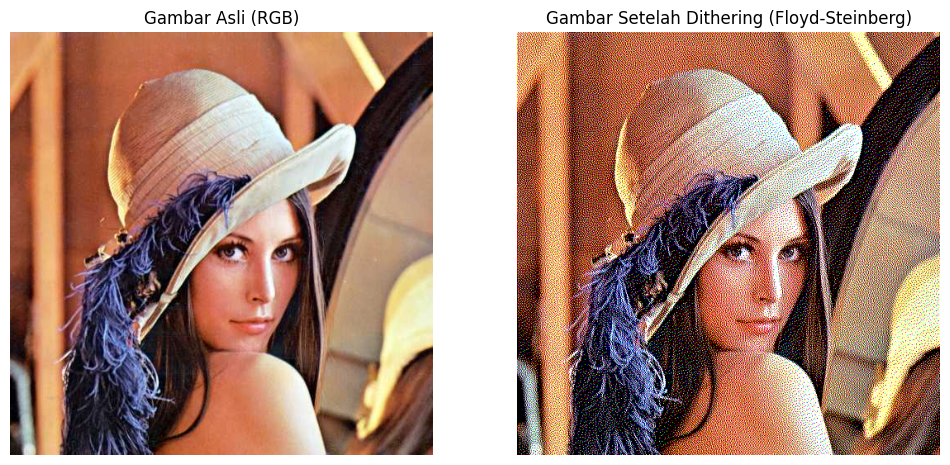

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk thresholding menggunakan np.clip
def threshold(value):
    return np.clip(value, 0, 255)

# Fungsi untuk menerapkan dithering Floyd-Steinberg
def floyd_steinberg_dithering(image):
    # Mendapatkan dimensi gambar
    height, width = image.shape[:2]

    # Membuat salinan gambar untuk hasil dithering
    dithered_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Looping untuk setiap piksel dalam gambar
    for y in range(height):
        for x in range(width):
            # Mengambil nilai piksel lama
            pixel_old = image[y, x].astype(float)
            pixel_new = np.round(pixel_old / 255.0) * 255

            # Menerapkan threshold
            dithered_image[y, x] = threshold(pixel_new)

            # Menghitung error
            error = pixel_old - dithered_image[y, x].astype(float)

            # Mendistrubusikan error ke piksel sebelah
            if x + 1 < width:
                image[y, x + 1] = threshold(image[y, x + 1] + error * 7 / 16)
            if x - 1 >= 0 and y + 1 < height:
                image[y + 1, x - 1] = threshold(image[y + 1, x - 1] + error * 3 / 16)
            if y + 1 < height:
                image[y + 1, x] = threshold(image[y + 1, x] + error * 5 / 16)
            if x + 1 < width and y + 1 < height:
                image[y + 1, x + 1] = threshold(image[y + 1, x + 1] + error * 1 / 16)

    return dithered_image

# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/Semester 5/Pengolahan Citra dan Visi Komputer/Modul_6/lena.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menerapkan dithering Floyd-Steinberg
dithered_image = floyd_steinberg_dithering(image_rgb.copy())

# Menampilkan gambar asli dan hasil setelah dithering
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gambar asli
axes[0].imshow(image_rgb)
axes[0].set_title('Gambar Asli (RGB)')
axes[0].axis('off')

# Gambar Setelah Dithering
axes[1].imshow(dithered_image)
axes[1].set_title('Gambar Setelah Dithering (Floyd-Steinberg)')
axes[1].axis('off')

plt.show()


# TUGAS 9

<ipython-input-31-c614d8c36745>:23: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 550 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  dithered_img[y, x] = new_pixel


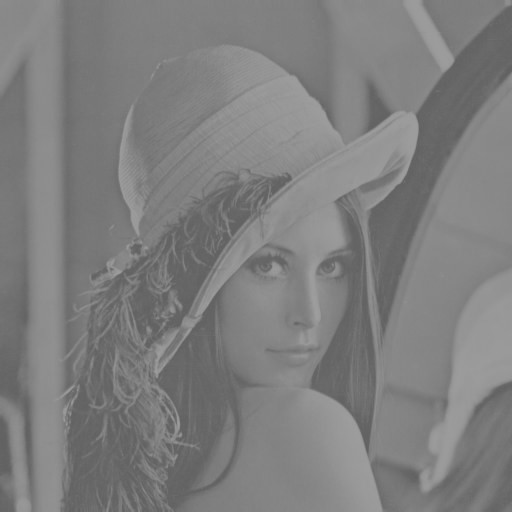

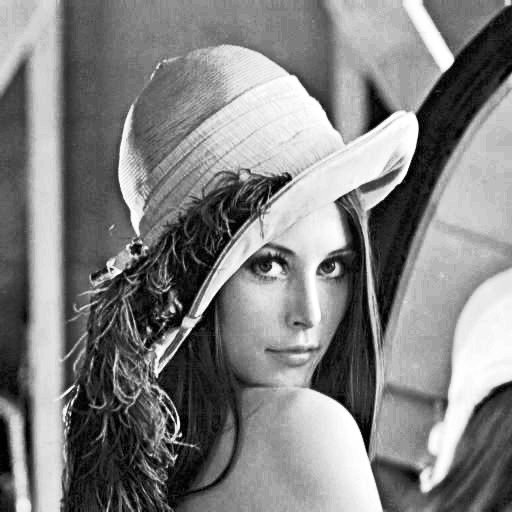

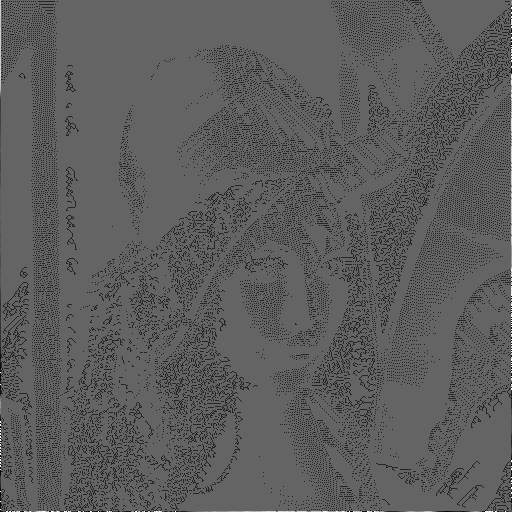

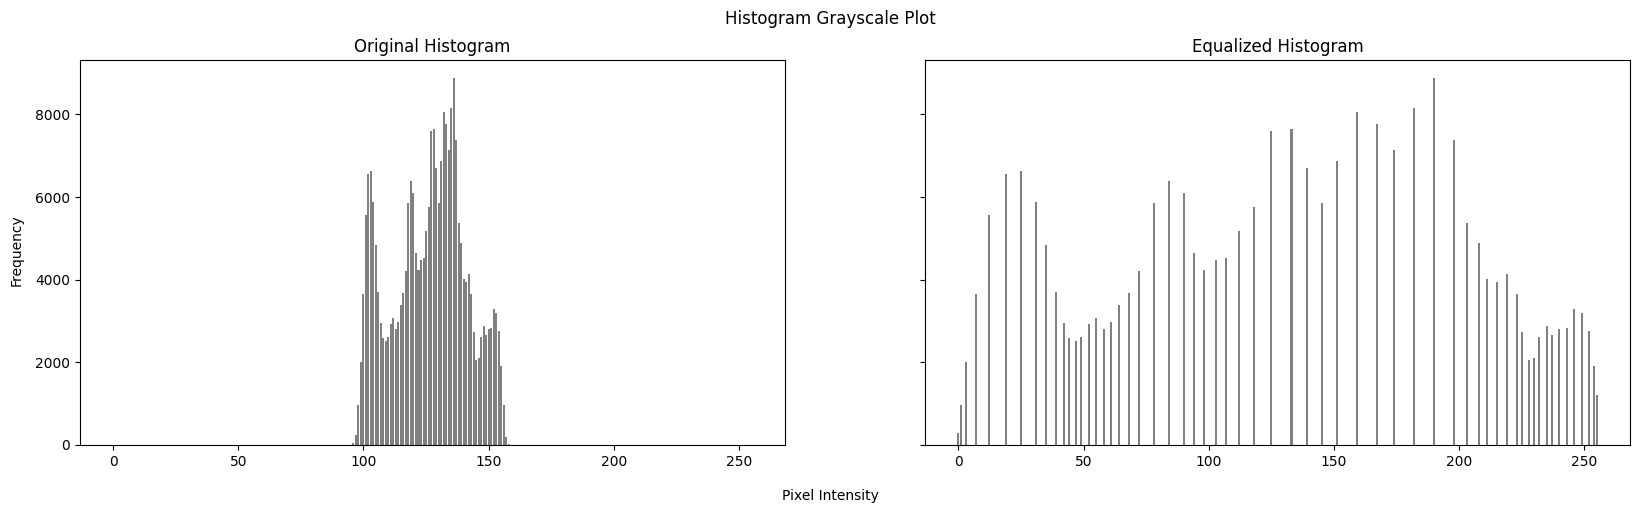

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Membaca image
image_path = "/content/drive/MyDrive/Semester 5/Pengolahan Citra dan Visi Komputer/Modul_6/lena_lc.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Menerapkan histogram equalization
equalized_image = cv2.equalizeHist(original_image)

# Membuatkan fungsi untuk Floyd-Steinberg dithering
def floyd_steinberg_dithering(src_image):
    height, width = src_image.shape
    dithered_img = np.copy(src_image)
    threshold = 230

    for y in range(height - 1):
        for x in range(1, width - 1):
            old_pixel = dithered_img[y, x]
            new_pixel = 550 if old_pixel >= threshold else 100
            dithered_img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            dithered_img[y, x + 1] += quant_error * 1 / 16
            dithered_img[y + 1, x - 1] += quant_error * 1 / 16
            dithered_img[y + 1, x] += quant_error * 3 / 16
            dithered_img[y + 1, x + 1] += quant_error * 3 / 16

    return dithered_img

# Menerapkan fungsi dithering
dithered_image = floyd_steinberg_dithering(equalized_image)

# kalkulasi histograms untuk gambar asli and hasil setelah equalized
hist_original = cv2.calcHist([original_image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale Plot')
fig.text(0.09, 0.5, 'Frequency', va='center', rotation='vertical')
fig.text(0.5, 0, 'Pixel Intensity', ha='center')

axes[0].bar(range(256), hist_original[:, 0], color='gray')
axes[0].set_title('Original Histogram')

axes[1].bar(range(256), hist_equalized[:, 0], color='gray')
axes[1].set_title('Equalized Histogram')

# Display images
cv2_imshow(original_image)
cv2_imshow(equalized_image)
cv2_imshow(dithered_image)
